In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import os
import tqdm
import datetime

In [6]:
server_dir = '/home/robbie/uit_mnt'
satam_directory = f'{server_dir}/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/'
scratch=f'{server_dir}/scratch/robbie/nrcs/pickles'
nh_it_dir=f'{satam_directory}OSISAF Sea Ice Type'
sh_it_dir = f'{server_dir}/scratch/robbie/nrcs/ice_type'
sh_latf = 'south_lat_12km.hdf'
sh_latgrid = Dataset(f'{sh_it_dir}/{sh_latf}')
sh_latgrid = np.array(sh_latgrid['Latitude [degrees]'])
st=r'$^{\rm st}$'

In [3]:
mission='cs2' #MUST BE CS2 IF CRYOSAT
# mission='ak'
hem='nh'

csvs_dir = f'{server_dir}/home/romal7177/nrcs/csvs'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]
HB_csvs = [x for x in all_csvs if 'HB' in x]
all_csvs = [x for x in all_csvs if 'HB' not in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)
cs2_nh = pd.concat(list_of_dfs)

list_of_dfs=[]
for i in tqdm.tqdm(HB_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)
cs2_nh_HB = pd.concat(list_of_dfs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 134/134 [00:02<00:00, 64.02it/s]


In [4]:
##########

df_HB = cs2_nh_HB

df_HB['doy']=[x.day_of_year for x in df_HB['date']]
df_HB['dsa']=[x-250 if x>250 else 365+x-250 for x in df_HB['doy']]


clean_x = np.array(df_HB['dsa'])[~np.isnan(df_HB['means_fyi'])]
clean_y = np.array(df_HB['means_fyi'])[~np.isnan(df_HB['means_fyi'])]
h_rm_x = np.arange(60,256)
h_rm_y = []
for i in h_rm_x:
    
    y_in_window = clean_y[(clean_x<i+10)&(clean_x>i-10)]
    
    h_rm_y.append(np.nanmean(y_in_window))

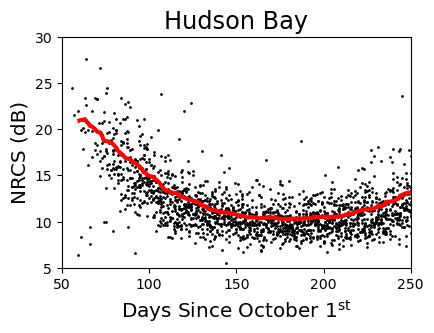

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6*0.75,3))

s=10
    
ax.plot(h_rm_x,10*np.log10(h_rm_y),lw=3,color='r')

ax.scatter(df_HB['dsa'],10*np.log10(df_HB['means_fyi']),s=1,color='k')

ax.set_ylim(5,30)
ax.set_xticks(np.arange(0,351,50))
ax.set_xticklabels(np.arange(0,351,50),rotation=0)

ax.set_xticks(np.arange(0,251,50))
ax.set_ylabel('NRCS (dB)',fontsize='x-large')
ax.set_xlim(50,250)
ax.set_xlabel('Days Since October 1'+st,fontsize='x-large')

ax.set_title('Hudson Bay',fontsize='xx-large')

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}Hudson_Bay.png',dpi=400,bbox_inches='tight')

Text(0.5, 0, 'Days Since October 1st')

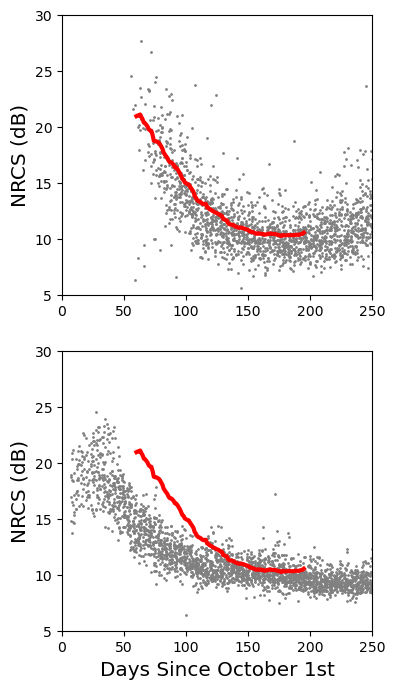

In [32]:
fig, axs = plt.subplots(2,1,figsize=(4,8))

ax1,ax2 = axs.reshape(-1)

s=10

##########

df = cs2_nh
df_HB = cs2_nh_HB

df['doy']=[x.day_of_year for x in df['date']]
df['dsa']=[x-250 if x>250 else 365+x-250 for x in df['doy']]


df_HB['doy']=[x.day_of_year for x in df_HB['date']]
df_HB['dsa']=[x-250 if x>250 else 365+x-250 for x in df_HB['doy']]


clean_x = np.array(df_HB['dsa'])[~np.isnan(df_HB['means_fyi'])]
clean_y = np.array(df_HB['means_fyi'])[~np.isnan(df_HB['means_fyi'])]
h_rm_x = np.arange(60,196)
h_rm_y = []
for i in h_rm_x:
    
    y_in_window = clean_y[(clean_x<i+10)&(clean_x>i-10)]
    
    h_rm_y.append(np.nanmean(y_in_window))

for ax in [ax1,ax2]:
    ax.plot(h_rm_x,10*np.log10(h_rm_y),lw=3,color='r')

ax1.scatter(df_HB['dsa'],10*np.log10(df_HB['means_fyi']),s=1,color='grey')

ax2.scatter(df['dsa'],10*np.log10(df['means_fyi']),s=1,color='grey')
         
for ax in [ax1,ax2]:
    ax.set_ylim(5,30)
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=0)
    ax.set_xlim(0,250)
    ax.set_xticks(np.arange(0,251,50))
    ax.set_ylabel('NRCS (dB)',fontsize='x-large')

ax2.set_xlabel('Days Since October 1st',fontsize='x-large')
